In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/MACHINE LEARNING/UNSUPERWISED LEARNING/K-MEANS/kmeansData (2).csv', header = None)

In [3]:
df

,0,1
0,1.42,0.67
1,2.05,1.70
2,3.20,3.52
3,3.70,0.15
4,4.70,1.45
5,6.17,2.67
6,7.80,3.70
7,8.74,4.52
8,9.25,2.15
9,9.70,3.45


In [4]:
df.shape

(10, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10 non-null     float64
 1   1       10 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state=0)
kmeans.fit(df)
kmeans.inertia_

15.485441666666665

In [7]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |      For an example of how to choose an optimal value for `n_clusters` refer to
 |      :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to t

In [8]:
from sklearn.cluster import KMeans
wcss = []

In [9]:
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=0)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

In [10]:
wcss

[103.48316999999999,
 24.68036,
 15.485441666666665,
 13.718358333333336,
 10.550233333333335,
 3.7981499999999997,
 2.8518999999999997,
 1.5068999999999995,
 0.7288999999999999]

# **ELBOW Cluster**

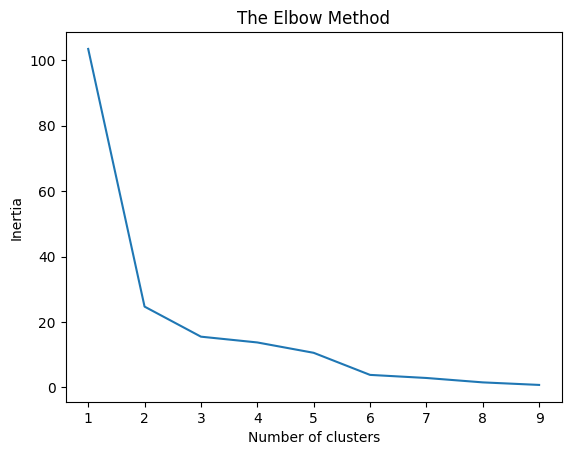

In [11]:
import matplotlib.pyplot as plt

plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=2, init = 'k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int32)

In [14]:
df['clusters'] = y_kmeans

In [15]:
df

,0,1,clusters
0,1.42,0.67,1
1,2.05,1.70,1
2,3.20,3.52,1
3,3.70,0.15,1
4,4.70,1.45,1
5,6.17,2.67,0
6,7.80,3.70,0
7,8.74,4.52,0
8,9.25,2.15,0
9,9.70,3.45,0
